<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 4. Interpolation
## Splines
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we learn how to assemble **splines** as an approximation of
discrete data.

We first import the `python` libraries needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Function
Next, we define the function, which we would like to examine.

In [2]:
def pol_f(x):
    '''
    # Calculate function
    '''
    pol_f = x*np.exp(-x/5.e0)
    return pol_f

We calculate the function on the interval $[0,50]$, once with high resolution to plot
(orig), once sampled for the approximation (data):

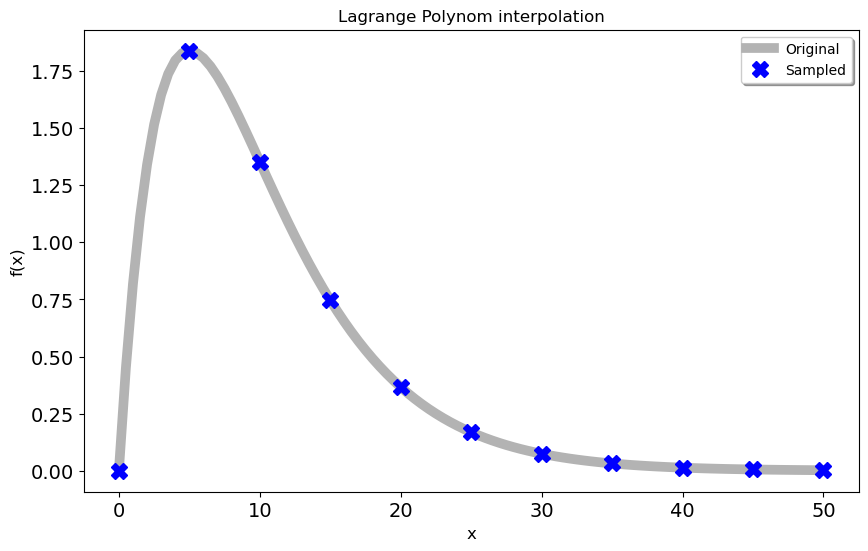

In [3]:
# define interval
a     = 0.e0
b     = 50.e0
## create "original" data (high resolution)
iorig = 101
xorig = np.linspace(a,b,iorig)
yorig = pol_f(xorig)
# create sample data (lower resolution)
idata = 11
xdata = np.linspace(a,b,idata)
ydata = pol_f(xdata)
# plot
plt.figure(figsize=(10.0, 6.0))
plt.rc("font",size=14)
plt.title('Lagrange Polynom interpolation',size=12)
plt.xlabel('x',size=12)
plt.ylabel('f(x)',size=12)
plt.plot(xorig,yorig,color=(0.7,0.7,0.7),linestyle='solid',linewidth=7,label='Original')
plt.plot(xdata,ydata,color='blue',marker='X',markersize=12,linewidth=0,label='Sampled')
#plt.plot(xint,yint,color='red',linestyle='solid',linewidth=2,label='Lagrange')
plt.legend(loc='upper right',shadow=True,fontsize=10)

## Linear spline

Next, we need to calculate a peace-wise **linear spline** for $n$ intervals, defined
by $n+1$ points $x_i$. The function values at this points are $y_i=f(x_i)$:
$$
\fbox{$
 S^{1,0}_i(x) = a_i + b_i (x-x_i), \quad i=1,n-1
 $}
$$
For the coefficients $a_i$ and $b_i$, we find:
$$
\begin{array}{rcl}
a_i &=& f(x_i) \\
b_i &=& {{a_{i+1}-a_i}\over{x_{i+1}-x_i}}
\end{array}
$$

In [4]:
def pol_spline10(x,y):
    '''
    #----------------------------------------------------------------------
    # subroutine calculates coefficients for linear spline
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    n = len(x)
    b10 = np.zeros(n)
    for i in np.arange(0,n-1):
        b10[i] = (y[i+1]-y[i]) / (x[i+1]-x[i])
    return b10

To assemble the piece-wise linear splines $S^{1,0}$, we need to code the equation:
$$
S^{1,0}_i(x) = a_i + b_i (x-x_i)
$$

In [5]:
def pol_splint10(xint,x,y,b10):
    '''
    #----------------------------------------------------------------------
    # subroutine calculates linear spline
    # (c) Georg Kaufmann
    ----------------------------------------------------------------------
    '''
    n = len(x)
    # if xint is outside the x() interval take a boundary value (left or right)
    if (xint <= x[0]):
        yint10 = y[0]
    elif (xint >= x[n-1]):
        yint10 = y[n-1]
    # find interval and evaluate spline interpolation
    else:
        for i in np.arange(0,n-1):
            if (xint >= x[i] and xint <= x[i+1]):
                h      = xint - x[i]
                yint10 = y[i] + b10[i]*h
    return yint10

Finally, interpolate our re-sampled function with the **linear spline**.

In [6]:
def show_linear_spline(n):
    # calculate sample points
    idata = n
    xdata = np.linspace(a,b,idata)
    ydata = pol_f(xdata)
    # initialize spline
    b10 = pol_spline10 (xdata,ydata)
    #[b32,c32,d32] = pol_spline32(xdata,ydata)
    #spline = scipy.interpolate.CubicSpline(xdata,ydata)
    # calculate interpolated points
    iint  = 41
    xint  = np.linspace(a,b,iint)
    yint10  = np.zeros(iint)
    for i in np.arange(0,len(xint)):
        yint10[i]  = pol_splint10(xint[i],xdata,ydata,b10)
    # plot
    plt.figure(figsize=(10.0, 6.0))
    plt.rc("font",size=14)
    plt.title('Linear spline S$^{1,0}$',size=12)
    plt.xlim([a,b])
    plt.ylim([-0.5,2])
    plt.xlabel('x',size=12)
    plt.ylabel('f(x)',size=12)
    plt.plot(xorig,yorig,color=(0.7,0.7,0.7),linestyle='solid',linewidth=7,label='Original')
    plt.plot(xdata,ydata,color='blue',marker='X',markersize=12,linewidth=0,label='Sampled')
    plt.plot(xint,yint10,color='green',linestyle='dashed',linewidth=2,label='Spline (1,0)')
    plt.legend(loc='upper right',shadow=True,fontsize=10)

In [7]:
# call interactive module
w = dict(
n=widgets.IntSlider(min=2,max=40,step=1,value=2,description='n'))

output = widgets.interactive_output(show_linear_spline, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

## Cubic spline

Next, we need to calculate a peace-wise **cubic spline** for $n$ intervals, defined
by $n+1$ points $x_i$. The function values at this points are $y_i=f(x_i)$:
$$
\fbox{$
 S_i(x) = a_i + b_i (x-x_i) + c_i (x-x_i)^2 + d_i (x-x_i)^3, \quad i=1,\dots,n-1
 $}
$$
For the coefficients $a_i$, $b_i$, $c_i$, and $d_i$, we find:
$$
\begin{array}{rcl}
a_i &=& f(x_i) \\
b_i &=& ...
\end{array}
$$

In [8]:
def pol_spline32(x,y):
    '''
    # subroutine calculates coefficients for cubic spline
    # (c) Georg Kaufmann
    '''
    n = len(x)
    b32 = np.zeros(n)
    c32 = np.zeros(n)
    d32 = np.zeros(n)
    # step 1: preparation
    d32[0] = x[1] - x[0]
    c32[1] = (y[1] - y[0])/d32[0]
    for i in np.arange(2,n): # 2,n-1
        d32[i-1]   = x[i] - x[i-1]
        b32[i-1]   = 2.0*(d32[i-2] + d32[i-1])
        c32[i] = (y[i] - y[i-1])/d32[i-1]
        c32[i-1]   = c32[i] - c32[i-1]
    # step 2: end conditions
    b32[0]   = -d32[0]
    b32[n-1] = -d32[n-2]
    c32[0]   = 0.0
    c32[n-1] = 0.0
    if (n != 3):
        c32[0]   = c32[2]/(x[3]-x[1]) - c32[1]/(x[2]-x[0])
        c32[n-1] = c32[n-2]/(x[n-1]-x[n-3]) - c32[n-3]/(x[n-2]-x[n-4])
        c32[0]   = c32[0]*d32[0]**2/(x[3]-x[0])
        c32[n-1] = -c32[n-1]*d32[n-2]**2/(x[n-1]-x[n-4])
    # step 3: forward elimination
    for i in np.arange(2,n+1): # 2,n
         h        = d32[i-2]/b32[i-2]
         b32[i-1] = b32[i-1] - h*d32[i-2]
         c32[i-1] = c32[i-1] - h*c32[i-2]
    # step 4: back substitution
    c32[n-1] = c32[n-1]/b32[n-1]
    for j in np.arange(1,n): # 1,n-1
         i      = n-j
         c32[i-1] = (c32[i-1] - d32[i-1]*c32[i])/b32[i-1]
    # step 5: compute spline coefficients
    b32[n-1] = (y[n-1] - y[n-2])/d32[n-2] + d32[n-2]*(c32[n-2] + 2.0*c32[n-1])
    for i in np.arange(1,n): # i = 1,n-1
        b32[i-1] = (y[i] - y[i-1])/d32[i-1] - d32[i-1]*(c32[i] + 2.0*c32[i-1])
        d32[i-1] = (c32[i] - c32[i-1])/d32[i-1]
        c32[i-1] = 3.0*c32[i-1]
    c32[n-1] = 3.0*c32[n-1]
    d32[n-1] = d32[n-2]
    return b32,c32,d32

In [9]:
def pol_splint32(xint,x,y,b32,c32,d32):
    '''
    #----------------------------------------------------------------------
    # subroutine calculates cubic spline
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    n = len(x)
    # if xint is outside the x() interval take a boundary value (left)
    if (xint <= x[0]):
        yint32 = y[0]
    # if xint is outside the x() interval take a boundary value (right)
    elif (xint >= x[n-1]):
        yint32 = y[n-1]
    # find interval and evaluate spline interpolation
    else:
        for i in np.arange(0,n-1): # 1,n-1
            if (xint >= x[i] and xint <= x[i+1]):
                h      = xint - x[i]
                yint32 = y[i] + b32[i]*h + c32[i]*(h**2) + d32[i]*(h**3)
    return yint32

In [10]:
def show_cubic_spline(n):
    # calculate sample points
    idata = n
    xdata = np.linspace(a,b,idata)
    ydata = pol_f(xdata)
    # initialize spline
    b10 = pol_spline10 (xdata,ydata)
    [b32,c32,d32] = pol_spline32(xdata,ydata)
    #spline = scipy.interpolate.CubicSpline(xdata,ydata)
    # calculate interpolated points
    iint  = 41
    xint  = np.linspace(a,b,iint)
    yint10  = np.zeros(iint)
    yint32  = np.zeros(iint)
    for i in np.arange(0,len(xint)):
        yint10[i]  = pol_splint10(xint[i],xdata,ydata,b10)
        yint32[i]  = pol_splint32(xint[i],xdata,ydata,b32,c32,d32)
    # plot
    plt.figure(figsize=(10.0, 6.0))
    plt.rc("font",size=14)
    plt.title('Cubic spline S$^{3,2}$',size=12)
    plt.xlim([a,b])
    plt.ylim([-0.5,2])
    plt.xlabel('x',size=12)
    plt.ylabel('f(x)',size=12)
    plt.plot(xorig,yorig,color=(0.7,0.7,0.7),linestyle='solid',linewidth=7,label='Original')
    plt.plot(xdata,ydata,color='blue',marker='X',markersize=12,linewidth=0,label='Sampled')
    plt.plot(xint,yint32,color='red',linestyle='solid',linewidth=3,label='Spline (3,2)')
    plt.plot(xint,yint10,color='green',linestyle='dashed',linewidth=2,label='Spline (1,0)')
    plt.legend(loc='upper right',shadow=True,fontsize=10)

In [11]:
# call interactive module
w = dict(
n=widgets.IntSlider(min=3,max=40,step=1,value=3,description='n'))

output = widgets.interactive_output(show_cubic_spline, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

## And back to the example $f(x)={{1}\over{x}}$ example

In [ ]:
import scipy.interpolate

# define function
def f(x):
    f = 1/x
    return f
# define analytical solution
xorig2 = np.linspace(0.1,6,61)
yorig2 = f(xorig2)
# define sampling points and use lagrange from python
xdata = np.array([2.0,2.5,4.0])
ydata = f(xdata)
spline = scipy.interpolate.CubicSpline(xdata,ydata)


# plot
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim([0,6])
plt.plot(xorig2,yorig2,linewidth=8,color='gray',label='f(x)=1/x')
plt.plot(xorig2,spline(xorig2),linewidth=3,color='red',label='S$^{(3,2)}$(x)')
plt.legend()

[next >](Numerics_lab04_parametercurves.ipynb)